Membuat Histogram dan Scatterplot
1. data Multi Line Chart, Bar, Stacked sudah bisa jadi dasar bagi kami untuk membuat kampanye yang meningkatkan transaksi
2. Bagaimana dengan customer kita di DKI Jakarta? Apakah ada pola-pola menarik, terutama di Q4 2019?
3. Untuk itu, coba kita lihat dulu summary untuk tiap customer kita

Membuat Histogram
1. Melakukan Agregasi Data 
2. Membuat Histogram - Orders
3. Membuat Histogram - Quantity
4. Membuat Histogram - GMV
5. Kesimpulan

Melakukan Agregasi Data
1. Aku pun membuat dataframe baru bernama data_per_customer_dki_q4.
2. Di sini menggunakan function agg untuk melakukan agregasi data. Data agregat per customer yang diambil yaitu jumlah orders (banyaknya unique order_id), total quantity, dan total GMV.
3. Lalu didapatkan 711 customers yang bertransaksi di DKI Jakarta pada Q4 2020.
4. Jika diurutkan dari jumlah order terbanyak, bisa dilihat bahwa customer_id 12748 telah melakukan 29 transaksi dengan jumlah quantity mencapai 557, dan GMV lebih dari 175 Juta! Luar biasa ya. Customer-customer seperti ini harus tetap dijaga agar semakin loyal dengan produk. 

In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))
print(data_per_customer.sort_values(by='orders',ascending=False))

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


Keterangan Hasil Agregasi - Membuat Histogram - Orders
1. Dari dataframe baru ini kita bisa melihat persebaran datanya sekaligus untuk masing-masing variabel
2. Jadi : Menggunakan Histogram untuk Orders, Quantity & gmv
3. Aku pun menggunakan function plt.hist dan memasukkan variabel yang ingin dicek. Parameter lain yang bisa ditambahkan yaitu:
4. bins: jumlah bin (kelompok nilai) yang diinginkan
5. range: nilai minimum dan maksimum yang ditampilkan
6. orientation: ‘horizontal’ atau ‘vertikal’
7. color: warna bar di histogram
8. Analisis dimulai dari variabel orders, dimulai tanpa parameter apapun

<Figure size 432x288 with 0 Axes>

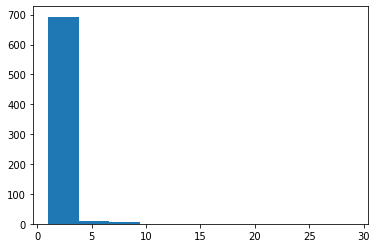

In [3]:
# Membuat Histogram - Orders (Langkah Pertama)
# Analisis dimulai dari variabel orders, dimulai tanpa parameter apapun
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.clf()
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['orders'])
plt.show()

Keterangan : Terlihat bahwa datanya terlalu berat ke kiri, hampir semua customer hanya bertransaksi kurang dari 10, maka dari itu perlu set range-nya, misalnya hanya dari 1 sampai 5

<Figure size 432x288 with 0 Axes>

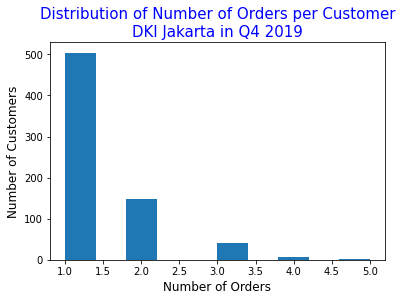

In [4]:
# Membuat Histogram - Orders (Langkah Kedua)
# Menambahkan Range (1 - 5)
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.clf()
# Histogram kedua
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize = 12)
plt.ylabel('Number of Customers', fontsize =12)
plt.show()

Membuat Histogram - Quantity
1. Kalau seperti ini, aku bisa membuat histogram untuk quantity juga

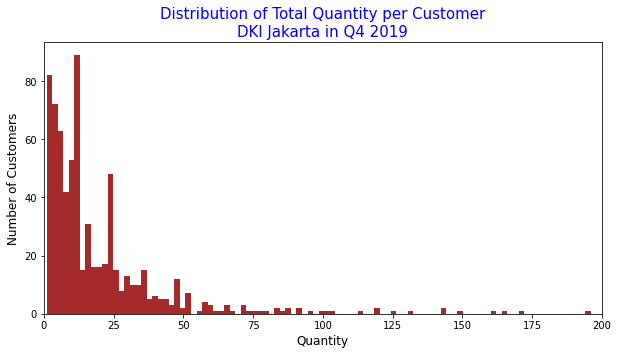

In [5]:
# Membuat Histogram - Langkah 2
# membuat histogram untuk quantity
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xlim(xmin=0,xmax=200)
plt.show()

Membuat Histogram - GMV
1. kalau untuk GMV, agak berbeda
2. Aku harus menormalisasi ticks label di sumbu-x karena angka yang menunjukkan GMV bisa jadi terlalu panjang - plt.xticks()

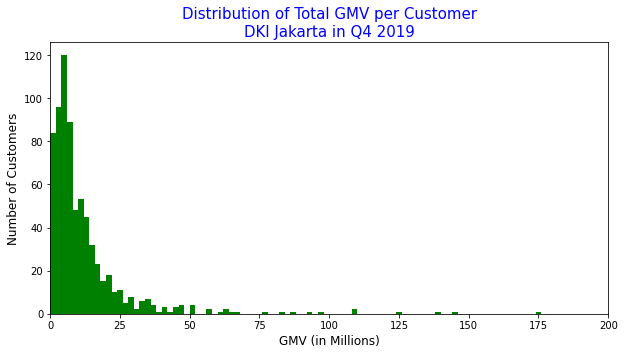

In [6]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize = 12)
plt.ylabel('Number of Customers',fontsize = 12)
plt.xlim(xmin=0,xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

Kesimpulan : Ternyata ketiga variabel tersebut memiliki distribusi yang mirip, grafiknya condong ke kiri.

Membuat Scatterplot
1. Tapi apakah variabel tersebut (quantity & gmv) bisa saling berkorelasi?
2. Aku pun segera melihatnya dengan scatterplot
3. Menggunakan function plt.scatter
4. Scatterplot quantity vs GMV - Langkah Pertama
5. Scatterplot quantity vs GMV - Langkah Kedua

<Figure size 432x288 with 0 Axes>

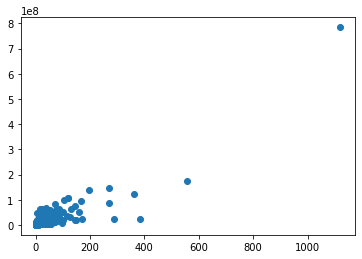

In [7]:
# Scatterplot quantity vs GMV - Langkah Pertama
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()

Keterangan : Terlihat bahwa memang semakin besar quantity-nya, GMV cenderung semakin tinggi. Tapi masalahnya datanya banyak terkumpul di nilai-nilai kecil, sehingga tidak begitu terlihat detailnya di area situ. 
1. Tolong perbesar daerah tersebut.

<Figure size 432x288 with 0 Axes>

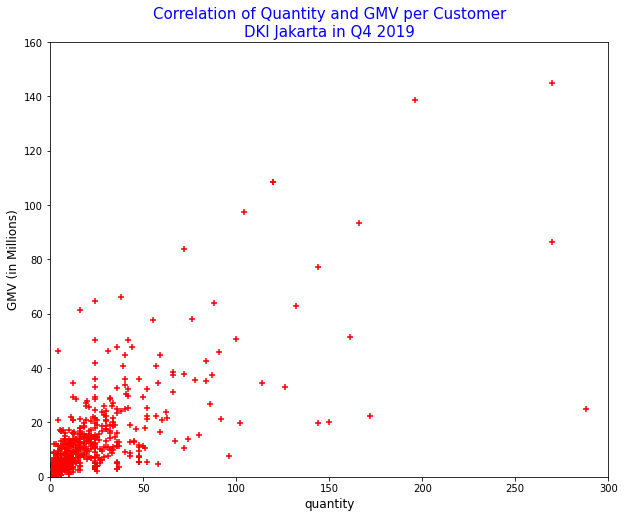

In [8]:
# Scatterplot quantity vs GMV - Langkah Kedua
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.clf()
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'],data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

Keterangan : Di sini semakin jelas bahwa quantity dan GMV itu berkorelasi positif. Jadi jika suatu customer telah membeli dengan banyak quantity, maka kemungkinan GMV dari dia juga semakin besar.